Programming Assignment 3
---------------------------------
Kiana Greek, 40135171
Comp 333 - Data Analytics
Task: apply python & pandas for data wrangling mimicking the process for data wrangling in Lab 8 with OpenRefine

Input: Ecological Data used in lab 8. In the dataset, I removed all observations that did not have a value for Country column. For the feature state, missing values were replaced with the country. Missing values for the county feature were replaced with the value from state.

Layout of code: each step is defined as a function & helper functions for that method will be defined in same code cell. At the end, the main functions are used on the dataset. The main functions assume perfect input - only column names for columns with string values will be given for text_facet and only column names with numeric values will be given for numeric_facet.

Step: construct a text facet
-
Param: a dataframe column (series)
Assumes its given column consists of only strings and no numbers
Displays number of empty values and value-count for nonempty values

In [17]:
import pandas as pd
def text_facet(self):
    #create a variable facet that stores the unique values and their counts for the series
    print('NAN: ',self.isnull().sum())
    print(self.value_counts())

Step: construct a numeric facet
------------------------------------------------------------------------
Param: a dataframe column (series)
Assumes its given column consisting of only numbers and no strings
if log_scale is true, then the values are scaled
For a given numeric column, a histogram of the count of values is given. The number of bins is given by the number of unique values in the column.

In [18]:
import numpy as np
def num_facet(self, log_scale=False):
    #plot the data with th number of bins being the number of unique values
    ax = self.plot.hist(bins = self.nunique(), logx = log_scale)
    ax.set_xlabel(self.name)
    ax.set_ylabel("Count")

Step: cluster a column of text entries
---------------------------------------
1) preprocessing - drop NaN values from column and convert remaining values to lower case
2) vectorization using TF-IDF Vectorization
3) implement kmeans - k is passed as a parm (num)
4) display 5 most common words in cluster

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

def cluster(self, num):
    #step 0 - dataframe to store results of clustering
    df = pd.DataFrame()

    #step 1
    ser = self.dropna() #returns a new series without NaN values - use this for the rest of step 1
    clean = ser.str.lower()
    df['Clean'] = clean #store results

    #step 2
    vectorizer = TfidfVectorizer() #initialize vector
    v = vectorizer.fit_transform(df['Clean'])
    terms = vectorizer.get_feature_names_out()

    #step 3
    kmeans = KMeans(n_clusters= num) #initialize model
    kmeans.fit(v) #fit the model
    kmeans_labels = pd.DataFrame(kmeans.predict(v))
    df['Clusters'] = kmeans_labels

    #step 4
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    results_dict = dict()
    for i in range(num):
        terms_list = list()
        for ind in order_centroids[i, :5]:
            terms_list.append(terms[ind])
        results_dict[f'Cluster {i}'] = terms_list
    df_clusters = pd.DataFrame.from_dict(results_dict)
    print(df_clusters)

Step: string processing
-
trimming all whitespace at the start and end of a string replacing internal whitespace by a single space
returns a new series of formatted data

In [20]:
import re

def remove_extra_spaces(self):
    new = self.apply(lambda x: " ".join(x.split()))
    return new

Using methods on ecological dataset
-
Data wrangling on numerica data then string data

In [21]:
#loading the dataset - needed to set encoding for it to work
data = pd.read_csv('ecological-data-messy.csv', encoding='windows-1252')
data.head()

C:\Users\Kiana Greek\AppData\Local\Temp\ipykernel_11528\3004629428.py:2: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ecological-data-messy.csv', encoding='windows-1252')


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


numeric facets for some numeric data

months


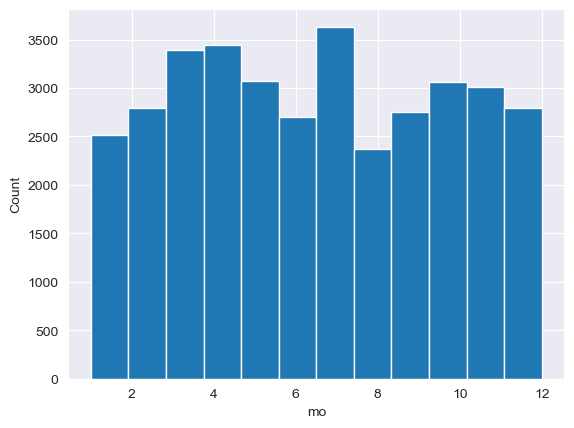

In [22]:
print("months")
num_facet(data['mo'])


days


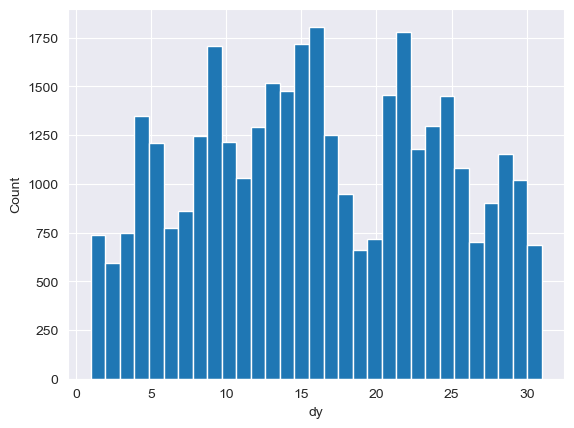

In [23]:
print('\ndays')
num_facet(data['dy'])


 year


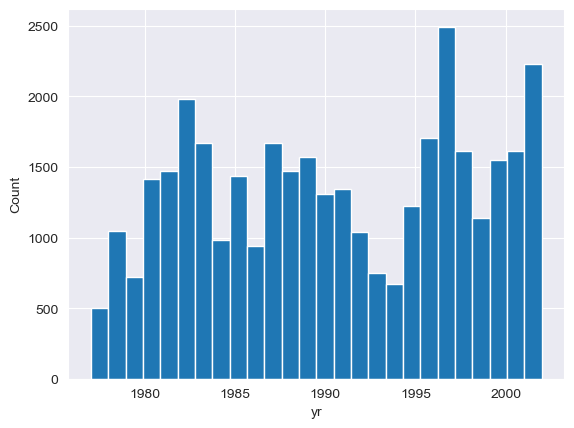

In [24]:
print('\n year')
num_facet(data['yr'])

Looking at text facets for some string data

In [25]:
print('species')
text_facet(data['species'])

print('\nScientific Name')
text_facet(data['scientificName'])

print('\nCounty')
text_facet(data['county'])

print('\nState')
text_facet(data['state'])

print('\n Country')
text_facet(data['country'])

species
NAN:  2015
DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
OL     1006
PM      899
AH      437
AB      303
SS      248
SH      147
SA       75
RF       75
CB       50
BA       46
SF       43
SO       43
DX       40
PC       39
PL       36
PH       32
CQ       16
CM       13
OX       12
UR       10
PI        9
PG        8
UP        8
RO        8
PX        6
SU        5
PU        5
US        4
UL        4
ZL        2
AS        2
RX        2
SC        1
ST        1
CT        1
CU        1
CS        1
CV        1
Name: species, dtype: int64

Scientific Name
NAN:  15318
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys spectabilis               2504
Onychomys torridus                  2249
Onychomys leucogaster               1006
Ammospermophilus harrisi             435
Amphispiza bilineata                 289
Baiomys taylori                       46
Dipodomys sp.                   

In [26]:
#remove entries with missing values & display text facets again
data = data.dropna(how = 'any', subset = ['species','scientificName', 'country'])

print('species')
text_facet(data['species'])

print('\nScientific Name')
text_facet(data['scientificName'])

print('\nCountry')
text_facet(data['country'])

species
NAN:  0
AH    437
AB    239
AS      2
Name: species, dtype: int64

Scientific Name
NAN:  0
Ammospermophilus harrisi     435
Amphispiza bilineata         230
Amphespiza bilineata           7
Ammodramus savannarum          2
  Amphispiza bilineata         1
  Amphispiza bilineata         1
Ammospermophilis harrisi       1
Ammospermophilus harrisii      1
Name: scientificName, dtype: int64

Country
NAN:  0
ECUADOR                     270
UNITED STATES               231
AUSTRALIA                   102
HT                           33
United States of America     21
US                           15
INDIA                         6
Name: country, dtype: int64


String unification on scientific name & country

In [27]:
#remove extra spacing
data['scientificName'] = remove_extra_spaces(data['scientificName'])
data['country'] = remove_extra_spaces(data['country'])

#text facets
text_facet(data['scientificName'])
text_facet(data['country'])

#replace scientific name with corrected spelling and format
data.replace( {'Ammospermophilus harrisi':'Ammospermophilus harrisii', 'Amphispiza bilineata':'Amphispiza bilineata',
               'Amphespiza bilineata':'Amphispiza bilineata', 'Ammodramus savannarum': 'Ammodramus savannarum',
               'Ammospermophilis harrisi':'Ammospermophilus harrisii', 'Ammospermophilus harrisii ':'Ammospermophilus harrisii'
               }, inplace = True)

#unify format of countries
data.replace(to_replace=["UNITED STATES", "US","United States of America"], value="USA", inplace = True)
data.replace(to_replace='ECUADOR', value="Ecuador", inplace = True)
data.replace(to_replace='AUSTRALIA', value="Australia", inplace = True)
data.replace(to_replace='HT', value="Haiti", inplace = True)
data.replace(to_replace='INDIA', value="India", inplace = True)

NAN:  0
Ammospermophilus harrisi     435
Amphispiza bilineata         232
Amphespiza bilineata           7
Ammodramus savannarum          2
Ammospermophilis harrisi       1
Ammospermophilus harrisii      1
Name: scientificName, dtype: int64
NAN:  0
ECUADOR                     270
UNITED STATES               231
AUSTRALIA                   102
HT                           33
United States of America     21
US                           15
INDIA                         6
Name: country, dtype: int64


replacing empty values in state with country
repacling empty values in county with state

In [28]:
data['state'].fillna(data['country'], inplace = True)
data['county'].fillna(data['state'], inplace = True)
#check if applied
text_facet(data['state'])
text_facet(data['county'])

NAN:  0
Zamora-Chinchipe Province    207
USA                          177
Australia                    102
Loja Province                 63
Idaho                         48
Haiti                         33
Florida                       21
Washington                    21
Tamil Name                     3
West bengal                    3
Name: state, dtype: int64
NAN:  0
Zamora-Chinchipe Province    207
USA                          177
Australia                    102
Loja Province                 63
Idaho                         48
Haiti                         33
Jefferson                     12
Lewis                          9
Escambia                       3
Hernando                       3
Wakulla                        3
Jackson                        3
Leon                           3
Krishnagiri                    3
Franklin                       3
Gadsden                        3
Siligury                       3
Name: county, dtype: int64


clustering on scientificName, k is given by the amount of unique values in column

In [29]:
cluster(data['scientificName'], 4)

          Cluster 0         Cluster 1   Cluster 2         Cluster 3
0          harrisii         bilineata  savannarum         bilineata
1  ammospermophilus        amphispiza  ammodramus        amphispiza
2        savannarum        savannarum    harrisii        savannarum
3         bilineata          harrisii   bilineata          harrisii
4        amphispiza  ammospermophilus  amphispiza  ammospermophilus


C:\Users\Kiana Greek\AppData\Local\Temp\ipykernel_11528\1076401434.py:22: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(v) #fit the model


In [30]:
cluster(data['species'],3)

  Cluster 0 Cluster 1 Cluster 2
0        ab        ah        as
1        as        as        ah
2        ah        ab        ab


split scientificName column into 2 columns (12 and 13)

In [31]:
df = pd.DataFrame()
data[['Species','Genus']] = data.scientificName.str.split(" ",expand = True)
#check if added to end
data.head()

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,Species,Genus
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza,bilineata
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza,bilineata
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,Ammodramus,savannarum
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammodramus,savannarum
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammospermophilus,harrisii


In [32]:
#copy of species and genus
col_species = data['Species'].copy()
col_genus = data['Genus'].copy()

#remove genus & species column from data
data.drop(['Species','Genus'], inplace=True, axis=1)

#find index of scientificName to insert columns after
count = 0
for i in data.columns:
    if i == 'scientificName':
        index = count
        break
    count += 1

#insert species & genus after scientificName column
data.insert(loc = (count + 1), column = "Species - Scientific Name", value = col_species)
data.insert(loc = 13, column = "Genus", value = col_genus)
data.head()

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
